## Introduction
<details>
<summary>Fashion Apparel Classification project overview (Click me)</summary>

**Students**:
- Youssef ELMOUMEN,     FVW745
- Doha Djellit,     VFOAXE
- Thabet Asmaa A. H. Naima,     ZWGD9E

**Title:** Fashion Apparel Classification using the Fashion MNIST Dataset

**Objective:** The primary goal is to utilize deep learning techniques to train a Convolutional Neural Network (CNN) that accurately classifies different types of apparel from the Fashion MNIST dataset.

**Background:**
- The Fashion MNIST dataset by Zalando Research contains 70,000 grayscale images of 10 fashion categories, each of size 28x28 pixels. It serves as an advanced benchmark for machine learning algorithms.
- Automated classification is essential for inventory management, trend analysis, and enhancing the customer shopping experience, especially with the dynamic nature of fashion trends.

**Tasks:**

1. **Data Loading:**
   - Load the complete Fashion MNIST dataset into a Python environment for subsequent processing and model training.

2. **Data Visualization & Exploration:**
   - Visualize various apparel classes to understand category distribution and individual class image characteristics.

3. **Data Preprocessing & Image Augmentation:**
   - Perform normalization of image pixel values and encode categorical class labels.
   - Augment the dataset to enhance model generalizability through techniques like rotation, translation, and flipping.

4. **CNN Model Development:**
   - Design a CNN architecture tailored for the classification task.
   - Experiment with layers, activation functions, and hyperparameters to refine the model.

5. **Model Training and Testing:**
   - Train the CNN with the training set and validate its performance using the test set.
   - Implement callbacks and checkpoints for efficient training.

6. **Performance Evaluation:**
   - Use metrics such as accuracy and loss to evaluate model performance.
   - Create confusion matrices and classification reports to understand model behavior across all categories.

7. **Result Visualization:**
   - Plot accuracy and loss curves to visualize training history.
   - Display correctly and incorrectly classified images to provide qualitative insights into model performance.

**End Goal:**
- Develop a robust CNN model that classifies fashion apparel with high accuracy.
- Contribute insights to computer vision and fashion retail sectors by addressing real-world problems through technology.

**Dataset Availability:**
- The dataset is available on Kaggle: [Fashion MNIST Dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist)
- Source repository on GitHub: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)


**Labels**<br>
Each training and test example is assigned to one of the following labels:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot
</details>


In [ ]:
import json
import zipfile
import os
data_dir = os.path.expanduser('~') + '/data'
data_set='zalando-research/fashionmnist'

# YOU HAVE TO REFRESH THE DIRECTORY TO SEE THE DATA
def download_kaggle_data_set(dataset_name):
    !rm -rf sample_data
    !pip3 install kaggle  --break-system-packages > /dev/null
    kaggle_json={"username":"youssefelmoumen","key":"9e38b743dc216e501da2cdc7e2f080ce"}
    !rm -r ~/.kaggle
    !mkdir ~/.kaggle
    user_dir = os.path.expanduser('~')
    print(user_dir)
    with open(user_dir + '/.kaggle/kaggle.json', 'w') as file:
        json.dump(kaggle_json, file)

    !chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d $dataset_name
    !rm -r data
    !mkdir data
    with zipfile.ZipFile('fashionmnist.zip', 'r') as zip_ref:
        zip_ref.extractall('data')
    !rm fashionmnist.zip




In [ ]:
#Download the data
download_kaggle_data_set(data_set)

rm: cannot remove '/root/.kaggle': No such file or directory
/root
 99% 68.0M/68.8M [00:00<00:00, 162MB/s]
100% 68.8M/68.8M [00:00<00:00, 146MB/s]
rm: cannot remove 'data': No such file or directory


### Data Loading

In [1]:
test_data_file= 'D:\\elte_res\\OneDrive - Eotvos Lorand Tudomanyegyetem\\CSE\\ITDS\\My_Projects\\Fashion_MNIST_Image_Recognition\\fashion-mnist_test.csv'
train_data_file='D:\\elte_res\\OneDrive - Eotvos Lorand Tudomanyegyetem\\CSE\\ITDS\\My_Projects\\Fashion_MNIST_Image_Recognition\\fashion-mnist_train.csv'
labels ="D:\\elte_res\\OneDrive - Eotvos Lorand Tudomanyegyetem\\CSE\\ITDS\\My_Projects\\Fashion_MNIST_Image_Recognition\\t10k-labels-idx1-ubyte"

import pandas as pd
import numpy as np

# Train data
train_data = pd.read_csv(train_data_file)
#print(f'The number of NaN values in train data is {train_data.isna().sum().sum()}') #Prints the number of NaN values
train_data.head()
train_data.shape
train_data.describe()
train_data['label'].value_counts()
train_data.info()

# Test data
test_data = pd.read_csv(test_data_file)
#print(f'The number of NaN values in test data is {test_data.isna().sum().sum()}')
test_data.head()
test_data.shape
print(test_data.describe())
print(test_data['label'].value_counts())
print(test_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
              label        pixel1        pixel2        pixel3        pixel4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       4.500000      0.000400      0.010300      0.052100      0.077000   
std        2.872425      0.024493      0.525187      2.494315      2.208882   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000      2.000000     45.000000    218.000000    185.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  10000.000000  10000.000000  10000.000000  10

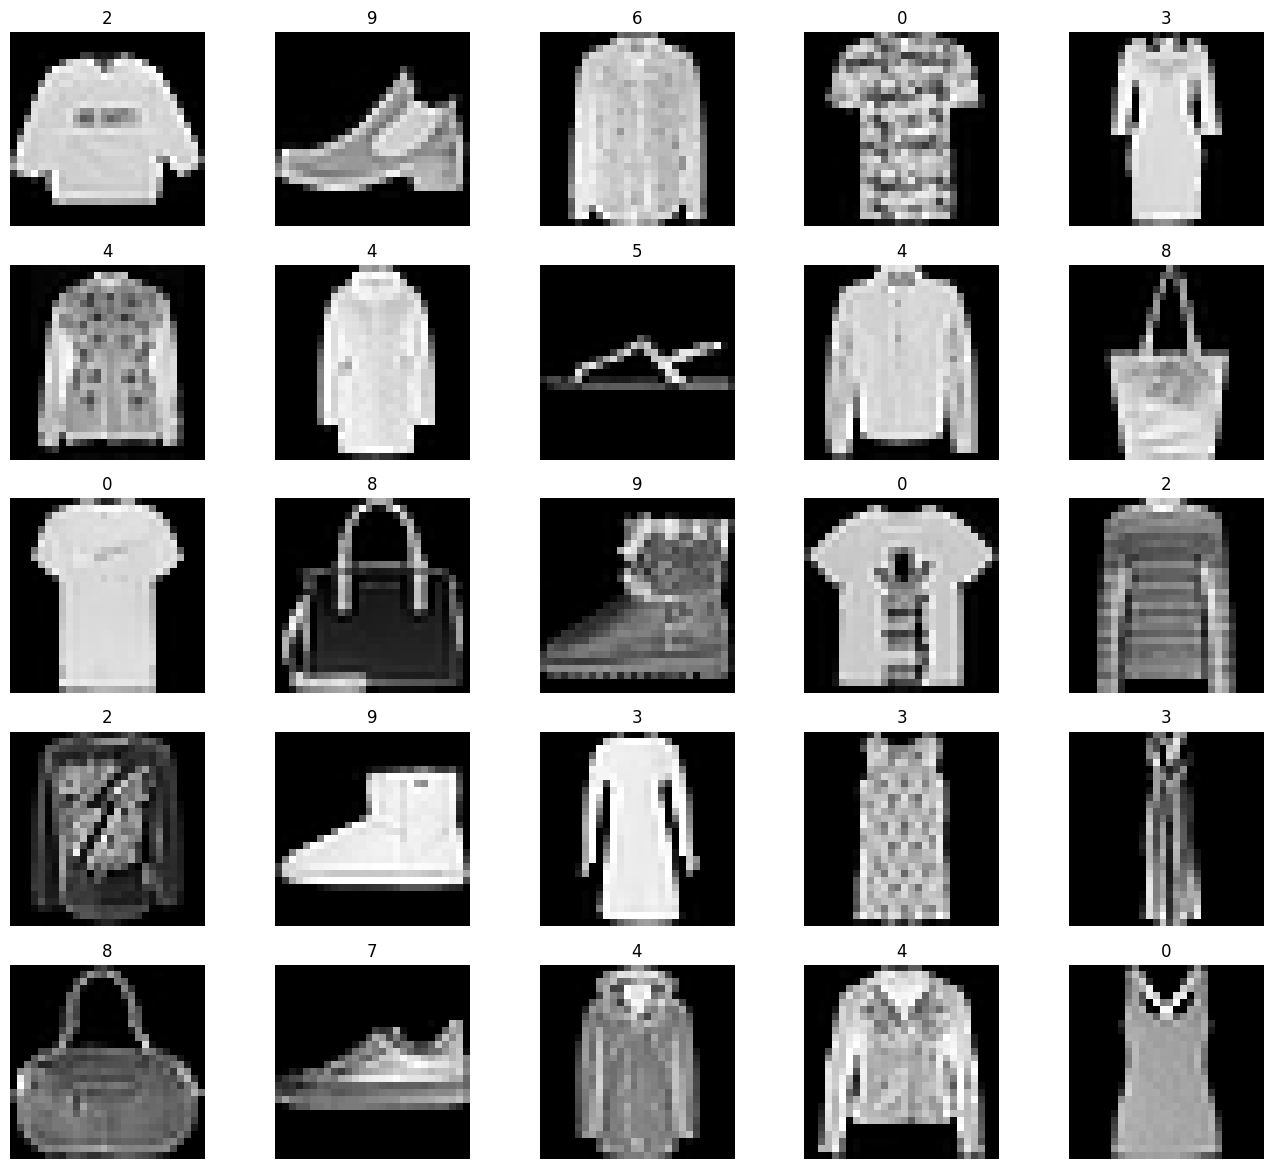

In [2]:

import matplotlib.pyplot as plt

def show_image(image):

    plt.imshow(image, cmap='gray')
    plt.show()

# def show_image_by_index(data, index):

#     image = data.iloc[index, 1:].values
#     image = image.reshape((28, 28))
#     show_image(image)
# #* images per row

def show_images(data, indexes, labels=None, columns=5):

    rows = len(indexes) // columns + 1
    fig = plt.figure(figsize=(20, 20))

    for i, index in enumerate(indexes):
        image = data.iloc[index, 1:].values
        image = image.reshape((28, 28))
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_title(data.iloc[index, 0])
        ax.axis('off')
        ax.imshow(image, cmap='gray')

    # Adjust the subplot parameters to give the specified margin
    plt.subplots_adjust(left=0.16, right=0.80, top=0.84, bottom=0.16)

    plt.show()


show_images(train_data, range(0, 25))


In [ ]:
#NB: This will take time while running it

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load training data
train_data = np.loadtxt('data/fashion-mnist_train.csv', delimiter=',',skiprows=1)
X_train = train_data[:, 1:]
y_train = train_data[:, 0]

# Load testing data
test_data = np.loadtxt('data/fashion-mnist_test.csv', delimiter=',',skiprows=1)
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

# Create an instance of the classifier (e.g., SVM)
classifier = SVC()

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Evaluate the classifier using the testing data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8921


## Training with CNN tensorflow

In [ ]:
!pip3 install tensorflow > /dev/null

In [4]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("GPU is available")
else:
    print("GPU is not available")



GPU is not available


In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load datasets
train_data = pd.read_csv(train_data_file)
test_data = pd.read_csv(test_data_file)

y_train = train_data['label'].values
y_test = test_data['label'].values

print(y_train)

# Drop the label column to isolate the images
X_train = train_data.drop(columns=['label']).values
X_test = test_data.drop(columns=['label']).values

# Reshape the data to fit the model input requirements
X_train = X_train.reshape(-1, 28, 28, 1)  # -1 for automatic deduction of number of images
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


[2 9 6 ... 8 8 7]


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


C:\Users\why_g\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc} loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0989 - loss: 2.3179
Test accuracy: 0.09950000047683716 loss: 2.3177201747894287


In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# Assuming 'train_data_file' and 'test_data_file' are defined with the paths to your CSV files
train_data_file = 'D:\\elte_res\\OneDrive - Eotvos Lorand Tudomanyegyetem\\CSE\\ITDS\\My_Projects\\Fashion_MNIST_Image_Recognition\\fashion-mnist_train.csv'
test_data_file = 'D:\\elte_res\\OneDrive - Eotvos Lorand Tudomanyegyetem\\CSE\\ITDS\\My_Projects\\Fashion_MNIST_Image_Recognition\\fashion-mnist_test.csv'
 
# Load datasets
train_data = pd.read_csv(train_data_file)
test_data = pd.read_csv(test_data_file)
 
# Extract labels and convert them to numpy arrays
y_train = train_data['label'].values
y_test = test_data['label'].values
 
# Drop the label column to isolate the image data
X_train = train_data.drop(columns=['label']).values
X_test = test_data.drop(columns=['label']).values
 
# Reshape the data to fit the model input requirements (28x28 pixels, 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
 
# Normalize the pixel values from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
 
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
 
# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
# Model Checkpoint and Early Stopping

checkpoint_filepath = 'D:\\elte_res\\OneDrive - Eotvos Lorand Tudomanyegyetem\\CSE\\ITDS\\My_Projects\\Fashion_MNIST_Image_Recognition\\checkpoint.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
 
# Fit the model with the checkpoint and early stopping callback
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=20,
          validation_data=(X_test, y_test),
          callbacks=[model_checkpoint_callback, early_stopping])
 
# Load the best weights (if necessary)
model.load_weights(checkpoint_filepath)
 
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}, loss: {test_loss:.3f}')

C:\Users\why_g\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
   4/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.1029 - loss: 5.1705  

C:\Users\why_g\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6545 - loss: 1.5643
Epoch 1: val_loss improved from inf to 0.66101, saving model to D:\elte_res\OneDrive - Eotvos Lorand Tudomanyegyetem\CSE\ITDS\My_Projects\Fashion_MNIST_Image_Recognition\checkpoint.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.6546 - loss: 1.5640 - val_accuracy: 0.7742 - val_loss: 0.6610
Epoch 2/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7879 - loss: 0.6511
Epoch 2: val_loss improved from 0.66101 to 0.50521, saving model to D:\elte_res\OneDrive - Eotvos Lorand Tudomanyegyetem\CSE\ITDS\My_Projects\Fashion_MNIST_Image_Recognition\checkpoint.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7879 - loss: 0.6511 - val_accuracy: 0.8339 - val_loss: 0.5052
Epoch 3/20
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8058 - loss: 0.5975
Epoch 3: val_loss improved from 0.50521 to 0.45330, saving model to D:\elte_res\OneDrive - Eotvos Lorand Tudomanye